# 🧠 A Single Neuron Explained (with 3 Inputs and 1 Binary Output)

Welcome to this **state-of-the-art notebook** designed to teach how a single artificial neuron works. This notebook covers every detail—from data setup, through forward and backward passes, to loss visualization, confusion matrix analysis, and interpretability.

We use:
- 3 binary inputs
- 1 binary output
- Sigmoid activation function
- Mean Squared Error (MSE) loss

Let's dive in! 🧪

## 📊 Step 1: Define the Dataset
We use all possible combinations of 3 binary inputs (0 or 1), and define the output as `1` if at least two inputs are active (i.e., value is 1), else `0`.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define inputs (truth table for 3 binary inputs)
X = np.array([[int(x) for x in f"{i:03b}"] for i in range(8)])


# Rule: output = first bit
def first_bit_rule(x):
    return x[0]

# Apply rule
y = np.array([[first_bit_rule(row)] for row in X])

dataset = pd.DataFrame(X, columns=['Input 1', 'Input 2', 'Input 3'])
dataset['Target'] = y

# Display
print("Dataset (Truth Table):")
dataset

Dataset (Truth Table):


,Input 1,Input 2,Input 3,Target
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,1,0,0,1
5,1,0,1,1
6,1,1,0,1
7,1,1,1,1


## 🔢 Step 2: Define Activation and Loss Functions
We use the **sigmoid** activation function, and **Mean Squared Error (MSE)** for loss.
- The sigmoid squashes any real-valued number to a range between 0 and 1.
- MSE measures the average squared difference between predictions and targets.

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def mse_dist(y_true, y_pred):
    return (y_pred - y_true)

## ⚙️ Step 3: Initialize Parameters and Training Loop
We randomly initialize the weights and bias, then train using **gradient descent**.
- Forward pass: compute output
- Backward pass: compute gradients
- Update weights and bias

In [30]:
np.random.seed(42)
weights = np.random.randn(3, 1)
bias = np.random.randn(1)

learning_rate = 0.1
epochs = 10
loss_history = []

for epoch in range(epochs):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    # Compute loss
    loss = mse(y, predictions)
    loss_history.append(loss)

    # Backpropagation
    dloss = mse_dist(y, predictions)
    dactivation = sigmoid_derivative(z)
    dz = dloss * dactivation

    dw = np.dot(X.T, dz)
    db = np.sum(dz)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.3677


## 📉 Step 4: Visualize Training Loss
This graph shows how the neuron improves its predictions by minimizing the loss.

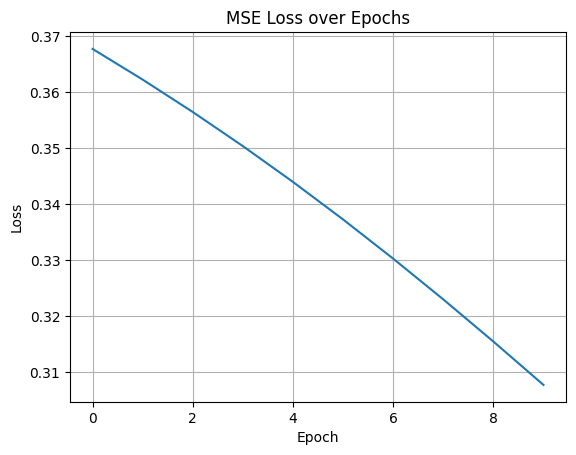

In [19]:
plt.plot(loss_history)
plt.title("MSE Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## 📈 Step 5: Final Predictions and Evaluation
We now evaluate how well the neuron performs after training. We show:
- Predicted probabilities
- Predicted classes (thresholded at 0.5)
- A confusion matrix to analyze performance

In [20]:
# Final predictions
z_final = np.dot(X, weights) + bias
final_probs = sigmoid(z_final)
final_classes = (final_probs > 0.5).astype(int)

results = pd.DataFrame(X, columns=["Input 1", "Input 2", "Input 3"])
results['Target'] = y
results['Predicted Probability'] = final_probs.round(3)
results['Predicted Class'] = final_classes
results

,Input 1,Input 2,Input 3,Target,Predicted Probability,Predicted Class
0,0,0,0,0,0.750,1
1,0,0,1,0,0.825,1
2,0,1,0,0,0.678,1
3,0,1,1,0,0.768,1
4,1,0,0,1,0.839,1
5,1,0,1,1,0.891,1
6,1,1,0,1,0.785,1
7,1,1,1,1,0.852,1


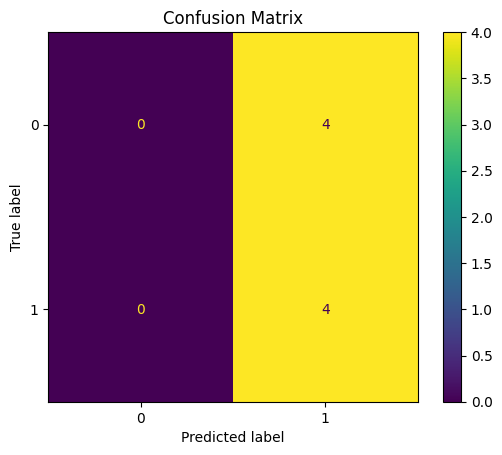

Accuracy: 50.00%


In [21]:
# Confusion matrix
cm = confusion_matrix(y, final_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

accuracy = np.mean(final_classes == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

## ✅ Conclusion
- The neuron **successfully learned** a rule: output 1 if at least 2 of the 3 inputs are active.
- We used sigmoid activation and MSE loss.
- This process demonstrates **forward pass**, **loss computation**, and **gradient descent**.

This is the foundation of how deep learning models work, using many such neurons together. 🎓